In [1]:
import numpy as np
from tasks.mnist.generate_scenes import make_one, make_batch
import matplotlib.pyplot as plt

from tasks.mnist.query_scene import generate_queries
%load_ext autoreload
%autoreload 2

WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GTX 1070 (CNMeM is disabled, cuDNN not available)


In [2]:
scene, glimpses, glimpse_xy, dirs, digits, colors, digit_labels, color_labels = make_batch(1)
glimpses = glimpses / 255.0
a, b, c = glimpses.shape
glimpses = glimpses.reshape(a * b, c)

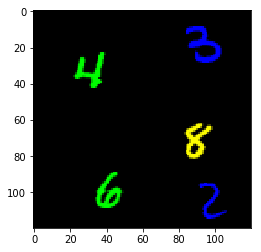

In [3]:
plt.imshow(scene[0].img.astype(np.uint8))
plt.show()

In [4]:
from train_queries import *
from train_queries import _unbound_map, _unbound_belief, _unbound_loc

In [7]:
fn = theano.function([
    glimpse_features,
    glimpse_positions,
    query_directions,
    query_digits,
    query_colors
], outputs=query_loc, allow_input_downcast=True)

In [9]:
fn(glimpses, glimpse_xy, dirs, digits, colors)

[array([[[[-2868.17236328,  2547.19970703, -2832.00097656, ...,
            -901.19995117,  1231.70581055,  -601.29345703],
          [ 2074.00952148,  1351.49768066, -3857.05224609, ...,
            2051.62304688,  -554.71691895, -2206.00268555],
          [ 3527.94775391,   882.58850098,    55.88935471, ...,
            -472.27230835,  -546.8638916 ,   541.63067627],
          ..., 
          [ -789.90563965,  1365.86853027,   470.99459839, ...,
           -1205.14831543,  -901.75494385,  1737.47546387],
          [ -526.37799072,  1807.11254883,   620.46783447, ...,
            -476.57543945,  -816.64434814, -3379.8347168 ],
          [-2743.39306641,  1896.84875488, -1092.26403809, ...,
           -2065.70361328,   239.02209473,  -385.54537964]],
 
         [[  302.0067749 ,  7560.61767578,   212.66998291, ...,
            1620.12744141,  -189.45782471,   402.37545776],
          [ 2747.52807617,  3778.26806641, -5290.44921875, ...,
            5254.69970703,  1088.8782959 ,   246.

In [10]:
_[0].shape

(1, 3, 28, 1024)

In [9]:
fn_miniX = theano.function([
], outputs=miniX, allow_input_downcast=True)

In [10]:
fn_miniX()[0].shape

(30, 30, 1024)

In [21]:
fn = theano.function([
    glimpse_features,
    glimpse_positions,
    query_digits,
    query_colors
], outputs=miniX.dot(_unbound_loc.dimshuffle(0, 1, 3, 2)), allow_input_downcast=True)

In [22]:
fn(glimpses, glimpse_xy, digits, colors)

[array([[[[[  1.33557177e+00,   1.33557177e+00,   1.33557177e+00, ...,
              1.33557177e+00,  -9.22887325e-01,  -5.13920307e+00],
           [ -5.17147064e+00,  -5.17147064e+00,  -5.17147064e+00, ...,
             -5.17147064e+00,  -9.59828186e+00,  -6.53149796e+00],
           [ -3.08765864e+00,  -3.08765864e+00,  -3.08765864e+00, ...,
             -3.08765864e+00,  -7.18050194e+00,  -2.76673079e+00]]],
 
 
         [[[ -2.98639512e+00,  -2.98639512e+00,  -2.98639512e+00, ...,
             -2.98639512e+00,  -5.83393288e+00,  -3.65413189e+00],
           [ -1.21265392e+01,  -1.21265392e+01,  -1.21265392e+01, ...,
             -1.21265392e+01,  -1.56206026e+01,  -1.00853615e+01],
           [ -1.19991961e+01,  -1.19991961e+01,  -1.19991961e+01, ...,
             -1.19991961e+01,  -1.84069653e+01,  -1.11737347e+01]]],
 
 
         [[[ -7.83361053e+00,  -7.83361053e+00,  -7.83361053e+00, ...,
             -7.83361053e+00,  -1.01013680e+01,   1.19962025e+00],
           [ -1.831754

In [17]:
fnshape = theano.function([
    glimpse_features,
    glimpse_positions,
    query_digits,
    query_colors
], outputs=_unbound_loc.dimshuffle(3, 0, 1, 2), allow_input_downcast=True)

In [18]:
fnshape(glimpses, glimpse_xy, digits, colors)

[array([[[[  2.14929767e-02,   2.14929767e-02,   2.14929767e-02, ...,
             2.14929767e-02,  -2.22720904e-03,   1.20206391e-02],
          [ -5.04211597e-02,  -5.04211597e-02,  -5.04211597e-02, ...,
            -5.04211597e-02,   6.72171963e-03,  -3.44038270e-02],
          [ -1.26676723e-01,  -1.26676723e-01,  -1.26676723e-01, ...,
            -1.26676723e-01,   2.32616439e-02,  -1.12855434e-01]]],
 
 
        [[[ -1.39323428e-01,  -1.39323428e-01,  -1.39323428e-01, ...,
            -1.39323428e-01,   2.27145985e-01,   2.61248291e-01],
          [ -1.39323428e-01,  -1.39323428e-01,  -1.39323428e-01, ...,
            -1.39323428e-01,   2.27145985e-01,   2.61248291e-01],
          [ -1.39323428e-01,  -1.39323428e-01,  -1.39323428e-01, ...,
            -1.39323428e-01,   2.27145985e-01,   2.61248291e-01]]],
 
 
        [[[ -3.79043788e-01,  -3.79043788e-01,  -3.79043788e-01, ...,
            -3.79043788e-01,   1.43389955e-01,   6.99620992e-02],
          [ -3.79043788e-01,  -3.790

In [19]:
_[0].shape

(1024, 1, 3, 28)

In [20]:
fn_miniX()[0].shape

(30, 30, 1024)

In [24]:
_22[0].shape

(30, 30, 1, 3, 28)